In [46]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import polytope
from matplotlib import pyplot as plt, patches
from matplotlib.lines import Line2D

In [27]:
reachSdp = torch.load("drawingdoubleIntegrator_reachlp.pth")
reachLip = torch.load("reachLipdoubleIntegrator_reachlp.pth")

In [28]:
print(reachLip.keys())
print(reachSdp.keys())

dict_keys([0, 1, 2, 3, 4, 5, 'reachlp'])
dict_keys([1, 2, 3, 4, 5])


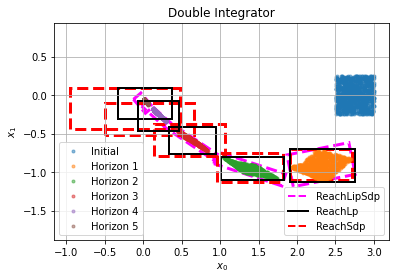

In [51]:
firstColor = "magenta"
secondColor = 'black'
thirdColor = 'red'

fig, ax = plt.subplots()
# exact sets
for i in range(6):
    inputData = reachLip[i]['exactSet']
    if i == 0:
        label = "Initial"
    else:
        label = "Horizon " + str(i)
    plt.scatter(inputData[:, 0], inputData[:, 1], marker='.', label=label, alpha=0.5)
leg1 = plt.legend()

# ReachLip
for i in range(1, 6):
    AA = -np.array(reachLip[i]['A'])
    AA = AA[:, :2]
    bb = reachLip[i]['d']

    pltp = polytope.Polytope(AA, bb)
    ax = pltp.plot(ax, alpha = 1, color='none', edgecolor=firstColor)
    ax.set_xlim([0, 5])
    ax.set_ylim([-4, 5])

    plt.axis("equal")
    plt.title("Double Integrator")
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
# ReachLp
reachlp = reachLip['reachlp']
for i in range(len(reachlp)):
    currHorizon = reachlp[i]
    rectangle = patches.Rectangle((currHorizon[0][0], currHorizon[1][0]),
                    currHorizon[0][1] - currHorizon[0][0],
                    currHorizon[1][1] - currHorizon[1][0],
                    edgecolor=secondColor, facecolor='none', linewidth=2, alpha=1)
    x = ax.add_patch(rectangle)
#ReachSdp
for i in range(1, 6):
    AA = np.array(reachSdp[i]['A'])
    AA = AA[:, :2]
    bb = reachSdp[i]['d']
    pltp = polytope.Polytope(AA, bb)
    ax = pltp.plot(ax, alpha = 1, color='none', edgecolor=thirdColor)
    ax.set_xlim([0, 5])
    ax.set_ylim([-4, 5])

    plt.axis("equal")
    plt.title("Double Integrator")
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')

custom_lines = [Line2D([0], [0], color=firstColor, lw=2, linestyle='--'),
                Line2D([0], [0], color=secondColor, lw=2, linestyle='-'),
                Line2D([0], [0], color=thirdColor, lw=2, linestyle='--')]
ax.legend(custom_lines, ['ReachLipSdp', 'ReachLp', "ReachSdp"], loc=4)

plt.gca().add_artist(leg1)
plt.grid()
plt.savefig("result.png")

